## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [82]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [83]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

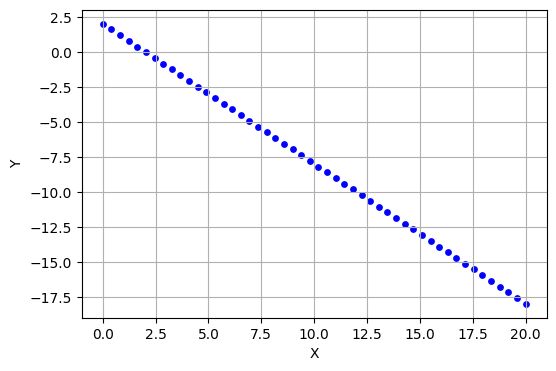

In [84]:
plt.figure(figsize=(6,4))
plt.scatter(X,y,marker='o',c='blue',s=15)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [85]:
def predict(theta,X):
    return theta[0] + theta[1] * X

In [86]:
def compute_error(hx,y):
    return hx - y

In [87]:
def compute_cost(e,X):
    return (np.linalg.norm(e) ** 2) / (2 * X.shape[0])

In [88]:
def compute_gradient_vector(e,X):
    d_theta_0 = np.sum(e) / X.shape[0]
    d_theta_1 = np.dot(e,X) / X.shape[0]
    gradient_vector = np.array([[d_theta_0], [d_theta_1]])
    return gradient_vector

In [89]:
def compute_gradient_norm(gradient_vector):
    return np.linalg.norm(gradient_vector)

In [90]:
def compute_accumulated_grad(previous_grad,gradient_vector):
    return previous_grad + gradient_vector ** 2

In [91]:
def update(theta,learning_rate,gradient_vector,accumulate_grad,epsilon):
    theta[0] -= (learning_rate / np.sqrt(accumulate_grad[0] + epsilon )) * gradient_vector[0]
    theta[1] -= (learning_rate / np.sqrt(accumulate_grad[1] + epsilon ))  * gradient_vector[1]
    return theta


In [92]:
def compute_AdaGrad(X,y,learning_rate,epsilon,max_iterations):
    loss =[]
    theta = np.array([[0.0],[0.0]])
    previous_grad=np.array([[0.0],[0.0]])
    all_theta_0 = []
    all_theta_1 = []
    all_hx = []
    tolerance = 0.001
    first_iteration = True
    for iteration in range(max_iterations):
        print(f"******************* Iteration: {iteration} *******************************")

        hx = predict(theta,X)
        all_hx.append(hx)
        print(f"h(x):{hx} \n")

        e = compute_error(hx,y)
        print(f"Error vector: {e} \n")

        j = compute_cost(e,X)
        loss.append(j)
        print(f"j = {j} \n")

        gradient_vector = compute_gradient_vector(e,X)
        print(f"Gradient_vector:  {gradient_vector} \n")

        gradient_vector_norm = compute_gradient_norm(gradient_vector)
        print(f"Gradient_vector_norm: {gradient_vector_norm} \n")

        accumulate_grad = compute_accumulated_grad(previous_grad,gradient_vector)
        previous_grad = accumulate_grad

        all_theta_0.append(theta[0][0])
        all_theta_1.append(theta[1][0])

        if not first_iteration:
            if abs(loss[iteration] - loss[iteration - 1]) < tolerance:
                print(f"Converged at iteration {iteration} with cost: {loss[iteration]} \n")
                break
            if gradient_vector_norm < tolerance:
                print(f"Stopping at iteration {iteration} due to small gradient norm: {gradient_vector_norm} \n")
                break

        theta = update(theta,learning_rate,gradient_vector,accumulate_grad,epsilon)
        print(f"new theta_0 : {theta[0][0]}")
        print(f"new theta_1 : {theta[1][0]}")

        first_iteration = False

    print ("************************** Training Report ****************************")
    print(f"Gradient Descent converged after {len(all_theta_1)} epochs \n")
    print(f"Final theta_0: {theta[0][0]}")
    print(f"Final theta_1: {theta[1][0]} \n")

    return all_theta_0, all_theta_1, loss, all_hx, theta


##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [93]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_AdaGrad(
        X, y, learning_rate=0.05,epsilon=1e-08, max_iterations=500
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
  -6.88641783  -7.19913562  -7.51185342  -7.82457121  -8.13728901
  -8.4500068   -8.7627246   -9.07544239  -9.38816019  -9.70087799
 -10.01359578 -10.32631358 -10.63903137 -10.95174917 -11.26446696
 -11.57718476 -11.88990255 -12.20262035 -12.51533814 -12.82805594
 -13.14077373 -13.45349153 -13.76620932 -14.07892712 -14.39164491
 -14.70436271 -15.0170805  -15.3297983  -15.64251609 -15.95523389] 

Error vector: [-2.63206192 -2.53661645 -2.44117098 -2.34572551 -2.25028004 -2.15483457
 -2.0593891  -1.96394363 -1.86849816 -1.77305269 -1.67760722 -1.58216175
 -1.48671628 -1.39127081 -1.29582534 -1.20037987 -1.1049344  -1.00948893
 -0.91404346 -0.81859799 -0.72315252 -0.62770705 -0.53226158 -0.43681611
 -0.34137064 -0.24592517 -0.1504797  -0.05503423  0.04041124  0.13585671
  0.23130218  0.32674765  0.42219312  0.51763859  0.61308406  0.70852953
  0.803975    0.89942047  0.99486594  1.09031141  1.18575688  1.28120235
  1.37664782  1.47209329 

In [94]:
from sklearn.metrics import r2_score
hx = predict(optimum_theta, X)
print(f"r2_score: {r2_score(y,hx)}")

r2_score: 0.9484638125710619


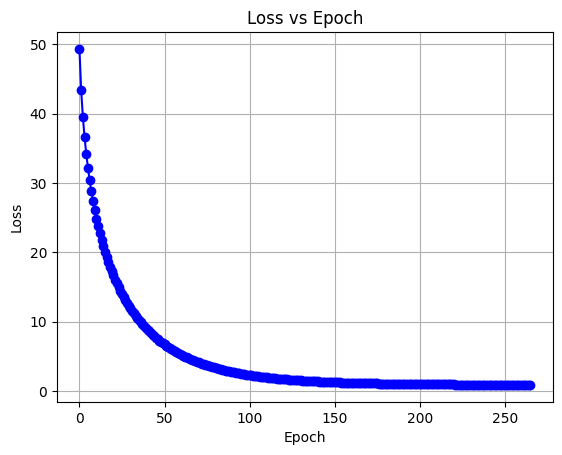

In [95]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

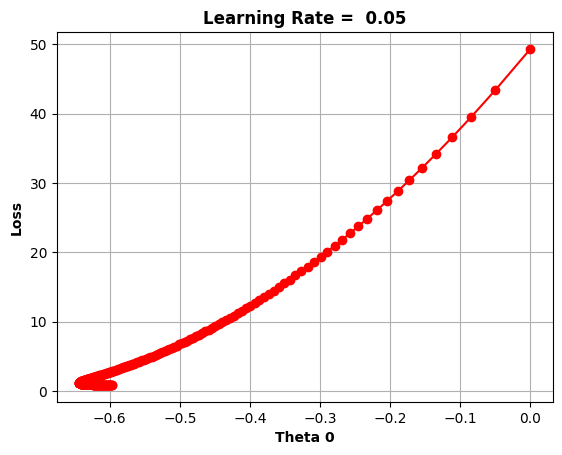

In [96]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.05',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

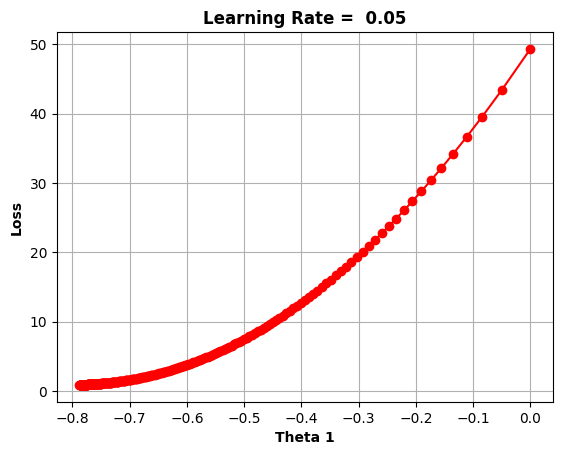

In [97]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.05',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

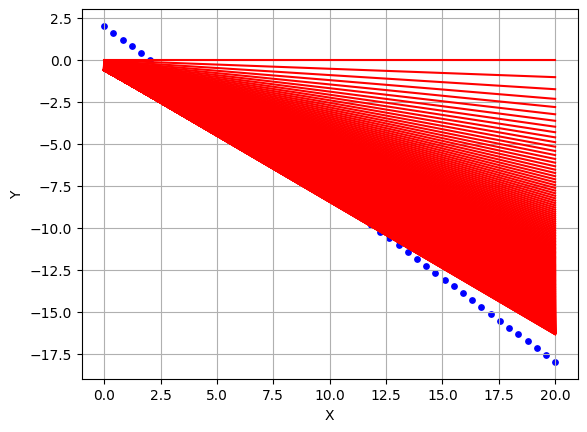

In [98]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

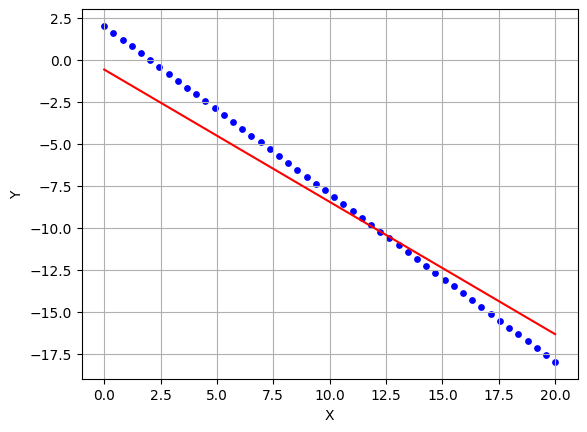

In [99]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [100]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_AdaGrad(
        X, y, learning_rate=0.005,epsilon=1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
        -6.74566192,  -6.96781681,  -7.18997171,  -7.4121266 ,
        -7.6342815 ,  -7.85643639,  -8.07859129,  -8.30074619,
        -8.52290108,  -8.74505598,  -8.96721087,  -9.18936577,
        -9.41152066,  -9.63367556,  -9.85583045, -10.07798535,
       -10.30014024, -10.52229514, -10.74445003, -10.96660493,
       -11.18875982, -11.41091472]), array([ -0.52536221,  -0.74753473,  -0.96970724,  -1.19187976,
        -1.41405228,  -1.63622479,  -1.85839731,  -2.08056983,
        -2.30274234,  -2.52491486,  -2.74708738,  -2.96925989,
        -3.19143241,  -3.41360493,  -3.63577744,  -3.85794996,
        -4.08012248,  -4.30229499,  -4.52446751,  -4.74664003,
        -4.96881254,  -5.19098506,  -5.41315758,  -5.63533009,
        -5.85750261,  -6.07967513,  -6.30184764,  -6.52402016,
        -6.74619268,  -6.96836519,  -7.19053771,  -7.41271023,
        -7.63488274,  -7.85705526,  -8.07922778,  -8.30140029,
        -8.52357281,  -8.74574

In [101]:
hx = predict(optimum_theta, X)

In [102]:
print(f"r2_score: {r2_score(y,hx)}")

r2_score: 0.7096780137845111


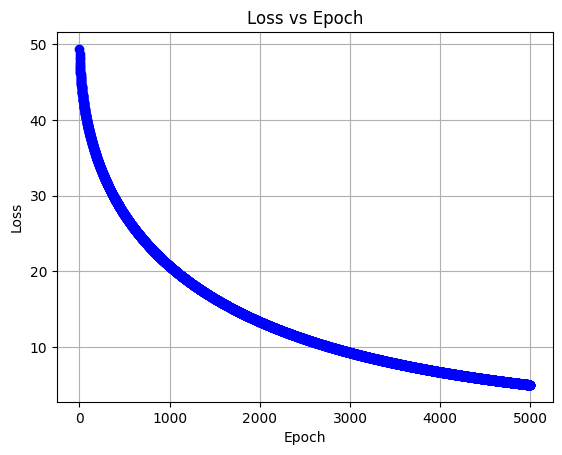

In [103]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

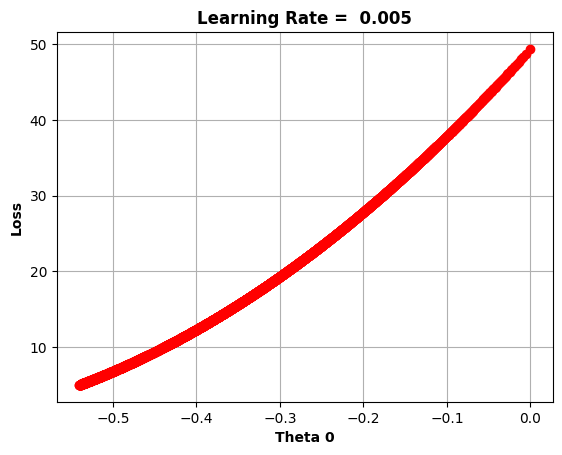

In [104]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

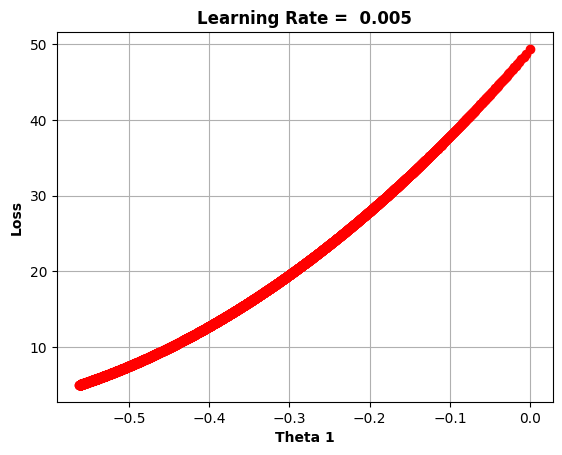

In [105]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

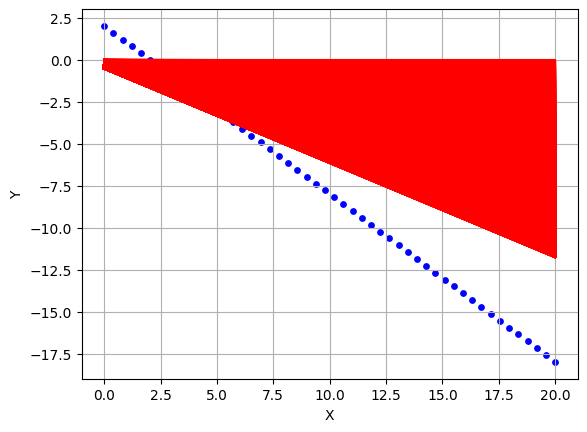

In [106]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

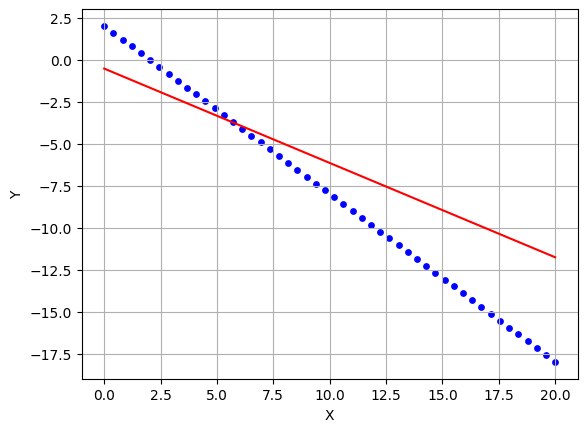

In [107]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [108]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_AdaGrad(
        X, y, learning_rate=0.0005,epsilon=1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
       -0.75256113, -0.77265758, -0.79275402, -0.81285047, -0.83294692,
       -0.85304336, -0.87313981, -0.89323625, -0.9133327 , -0.93342915,
       -0.95352559, -0.97362204, -0.99371849, -1.01381493, -1.03391138]), array([-0.04919517, -0.06929557, -0.08939597, -0.10949637, -0.12959676,
       -0.14969716, -0.16979756, -0.18989796, -0.20999835, -0.23009875,
       -0.25019915, -0.27029955, -0.29039994, -0.31050034, -0.33060074,
       -0.35070114, -0.37080153, -0.39090193, -0.41100233, -0.43110273,
       -0.45120312, -0.47130352, -0.49140392, -0.51150432, -0.53160471,
       -0.55170511, -0.57180551, -0.59190591, -0.61200631, -0.6321067 ,
       -0.6522071 , -0.6723075 , -0.6924079 , -0.71250829, -0.73260869,
       -0.75270909, -0.77280949, -0.79290988, -0.81301028, -0.83311068,
       -0.85321108, -0.87331147, -0.89341187, -0.91351227, -0.93361267,
       -0.95371306, -0.97381346, -0.99391386, -1.01401426, -1.03411465]), array([-0

In [109]:
hx = predict(optimum_theta, X)
print(f"r2_score: {r2_score(y,hx)}")

r2_score: -1.4736441832838643


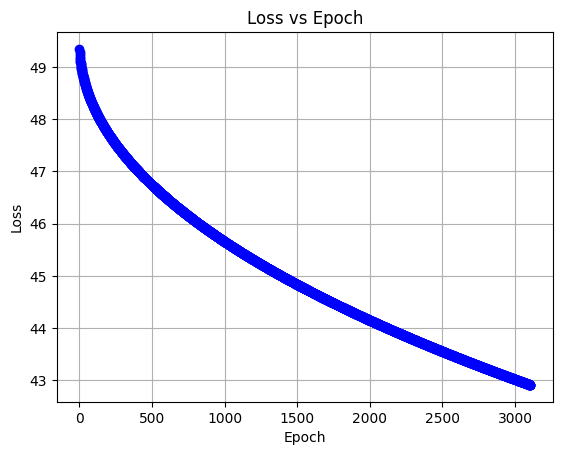

In [110]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

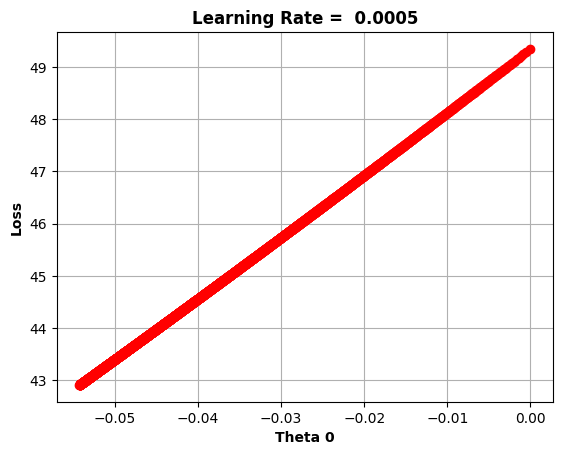

In [111]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.0005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

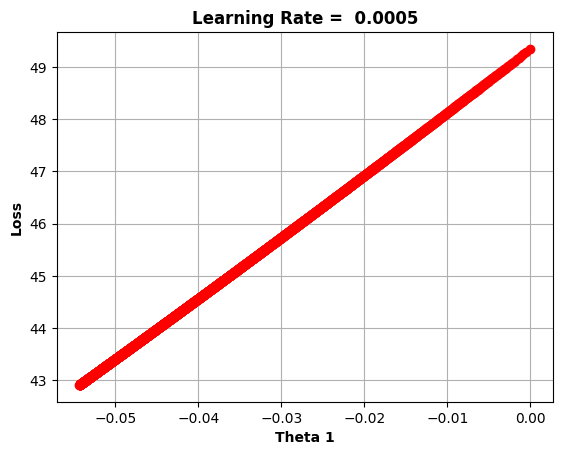

In [112]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.0005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

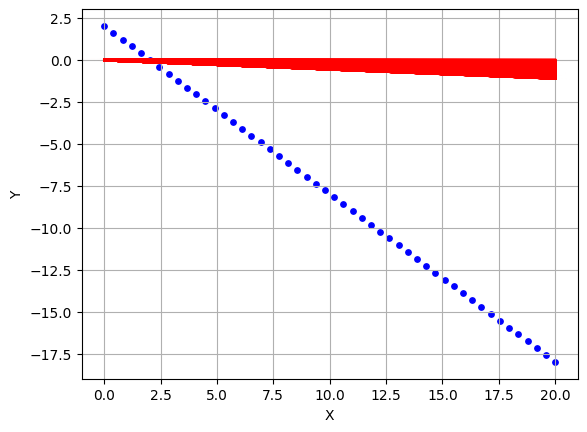

In [113]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

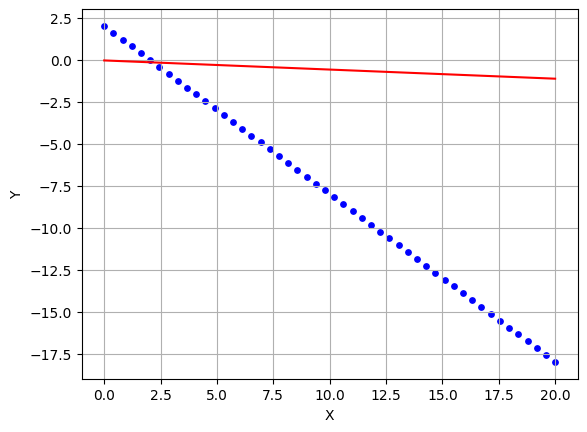

In [114]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [115]:
def compute_accumulated_rmsgrad(previous_grad,gradient_vector,decay_rate):
    return decay_rate * previous_grad + (1-decay_rate) * (gradient_vector ** 2)

In [116]:
def compute_RMSProp(X,y,learning_rate,decay_rate,epsilon,max_iterations):
    loss =[]
    theta = np.array([[0.0],[0.0]])
    previous_grad=np.array([[0.0],[0.0]])
    all_theta_0 = []
    all_theta_1 = []
    all_hx = []
    tolerance = 0.001
    first_iteration = True
    for iteration in range(max_iterations):
        print(f"******************* Iteration: {iteration} *******************************")

        hx = predict(theta,X)
        all_hx.append(hx)
        print(f"h(x):{hx} \n")

        e = compute_error(hx,y)
        print(f"Error vector: {e} \n")

        j = compute_cost(e,X)
        loss.append(j)
        print(f"j = {j} \n")

        gradient_vector = compute_gradient_vector(e,X)
        print(f"Gradient_vector:  {gradient_vector} \n")

        gradient_vector_norm = compute_gradient_norm(gradient_vector)
        print(f"Gradient_vector_norm: {gradient_vector_norm} \n")

        accumulate_grad = compute_accumulated_rmsgrad(previous_grad,gradient_vector,decay_rate)
        previous_grad = accumulate_grad

        all_theta_0.append(theta[0][0])
        all_theta_1.append(theta[1][0])

        if not first_iteration:
            if abs(loss[iteration] - loss[iteration - 1]) < tolerance:
                print(f"Converged at iteration {iteration} with cost: {loss[iteration]} \n")
                break
            if gradient_vector_norm < tolerance:
                print(f"Stopping at iteration {iteration} due to small gradient norm: {gradient_vector_norm} \n")
                break

        theta = update(theta,learning_rate,gradient_vector,accumulate_grad,epsilon)
        print(f"new theta_0 : {theta[0][0]}")
        print(f"new theta_1 : {theta[1][0]}")

        first_iteration = False

    print ("************************** Training Report ****************************")
    print(f"Gradient Descent converged after {len(all_theta_1)} epochs \n")
    print(f"Final theta_0: {theta[0][0]}")
    print(f"Final theta_1: {theta[1][0]} \n")

    return all_theta_0, all_theta_1, loss, all_hx, theta


##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [117]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_RMSProp(
        X, y, learning_rate= 0.05,decay_rate=0.9,epsilon=1e-08, max_iterations=500
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

******************* Iteration: 0 *******************************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.346938775510196 

Gradient_vector:  [[  8.        ]
 [114.69387755]] 

Gradient_vector_norm: 114.97254258164628 

new theta_0 : -0.15811388288

In [118]:
hx = predict(optimum_theta, X)
print(f"r2_score: {r2_score(y,hx)}")

r2_score: 0.9993447815911284


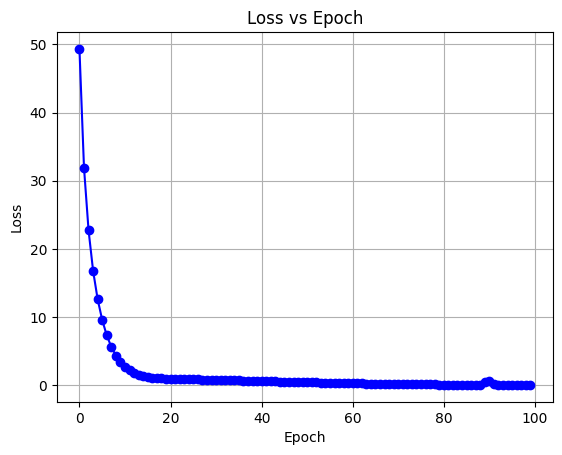

In [119]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

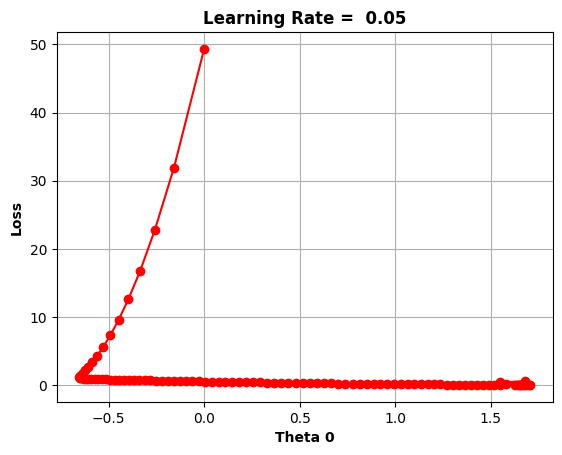

In [120]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.05',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

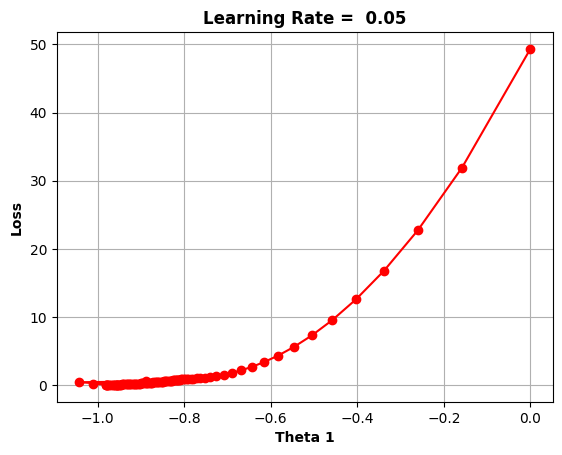

In [121]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.05',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

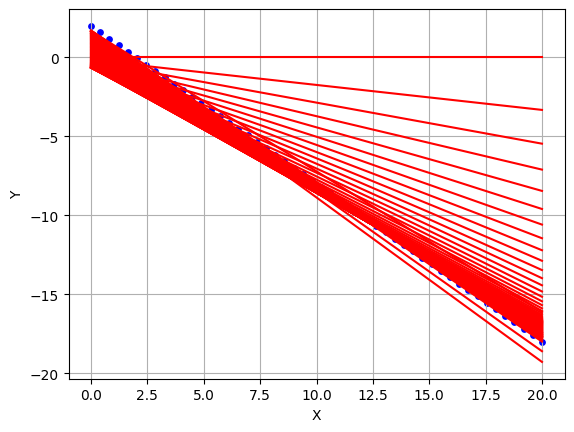

In [122]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

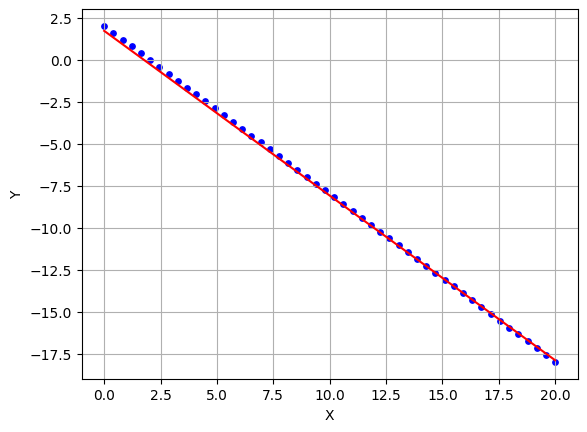

In [123]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [124]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_RMSProp(
        X, y, learning_rate= 0.005,decay_rate=0.9,epsilon=1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
        -7.5502219 ,  -7.79858991,  -8.04695792,  -8.29532592,
        -8.54369393,  -8.79206194,  -9.04042994,  -9.28879795,
        -9.53716596,  -9.78553396, -10.03390197, -10.28226998,
       -10.53063799, -10.77900599, -11.027374  , -11.27574201,
       -11.52411001, -11.77247802, -12.02084603, -12.26921403,
       -12.51758204, -12.76595005]), array([ -0.59960329,  -0.84963929,  -1.09967529,  -1.3497113 ,
        -1.5997473 ,  -1.84978331,  -2.09981931,  -2.34985532,
        -2.59989132,  -2.84992733,  -3.09996333,  -3.34999933,
        -3.60003534,  -3.85007134,  -4.10010735,  -4.35014335,
        -4.60017936,  -4.85021536,  -5.10025137,  -5.35028737,
        -5.60032337,  -5.85035938,  -6.10039538,  -6.35043139,
        -6.60046739,  -6.8505034 ,  -7.1005394 ,  -7.35057541,
        -7.60061141,  -7.85064741,  -8.10068342,  -8.35071942,
        -8.60075543,  -8.85079143,  -9.10082744,  -9.35086344,
        -9.60089944,  -9.85093

In [125]:
hx = predict(optimum_theta, X)
print(f"r2_score: {r2_score(y,hx)}")

r2_score: 0.9949107071902684


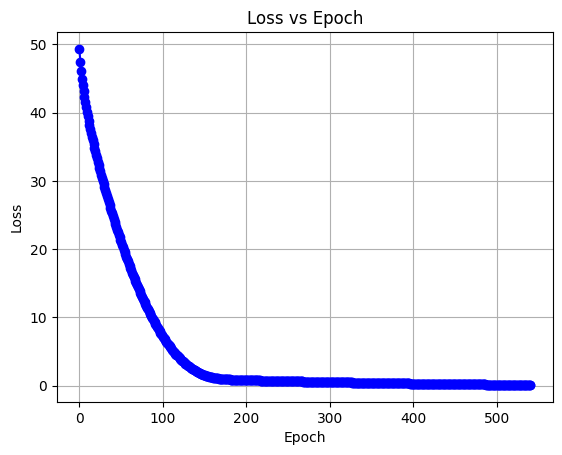

In [126]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

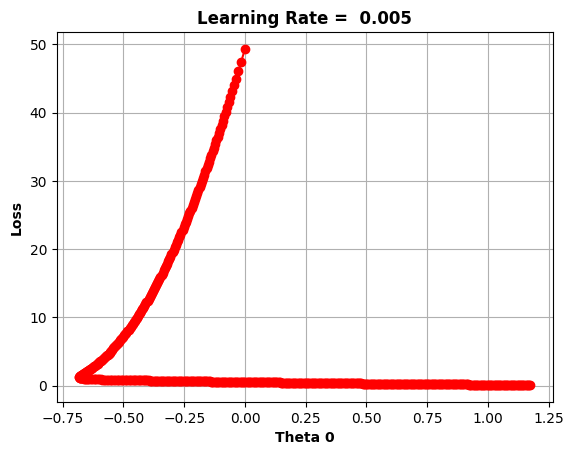

In [127]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

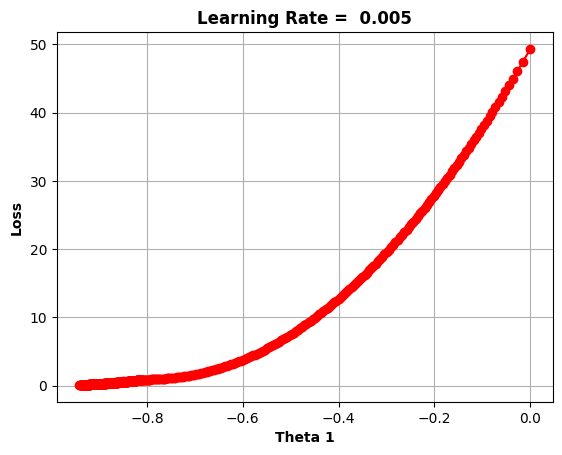

In [128]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

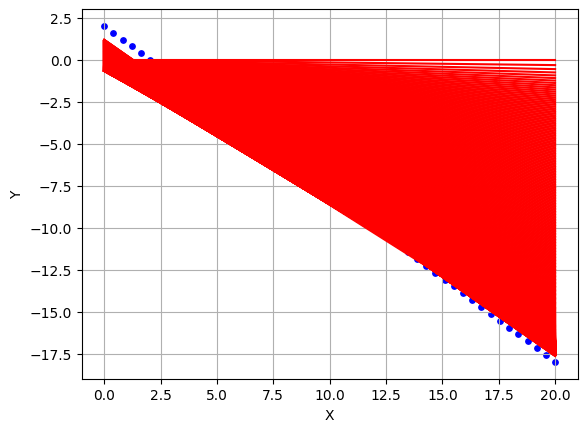

In [129]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

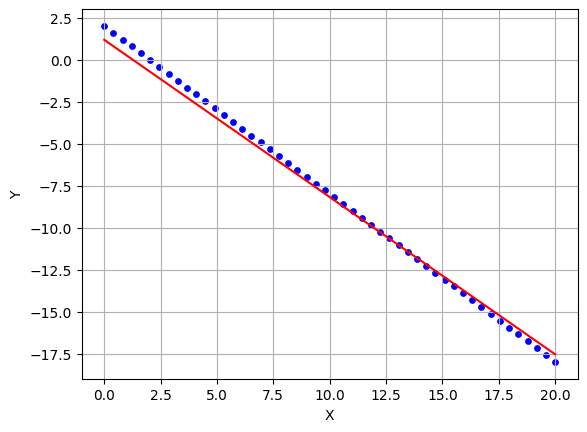

In [130]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [131]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_RMSProp(
        X, y, learning_rate= 0.0005,decay_rate=0.9,epsilon=1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
        -7.3925042 ,  -7.63532499,  -7.87814577,  -8.12096656,
        -8.36378734,  -8.60660813,  -8.84942891,  -9.0922497 ,
        -9.33507048,  -9.57789127,  -9.82071205, -10.06353284,
       -10.30635362, -10.54917441, -10.79199519, -11.03481598,
       -11.27763676, -11.52045755, -11.76327833, -12.00609912,
       -12.2489199 , -12.49174069]), array([ -0.59400588,  -0.83702625,  -1.08004663,  -1.323067  ,
        -1.56608738,  -1.80910775,  -2.05212813,  -2.2951485 ,
        -2.53816887,  -2.78118925,  -3.02420962,  -3.26723   ,
        -3.51025037,  -3.75327074,  -3.99629112,  -4.23931149,
        -4.48233187,  -4.72535224,  -4.96837262,  -5.21139299,
        -5.45441336,  -5.69743374,  -5.94045411,  -6.18347449,
        -6.42649486,  -6.66951523,  -6.91253561,  -7.15555598,
        -7.39857636,  -7.64159673,  -7.8846171 ,  -8.12763748,
        -8.37065785,  -8.61367823,  -8.8566986 ,  -9.09971898,
        -9.34273935,  -9.58575

In [132]:
hx = predict(optimum_theta, X)
print(f"r2_score: {r2_score(y,hx)}")

r2_score: 0.9476184838345945


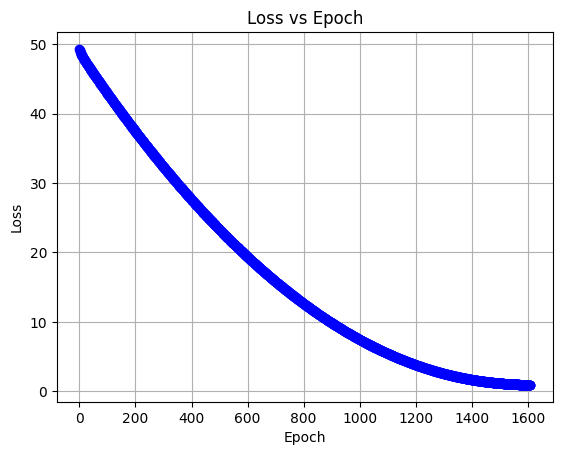

In [133]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

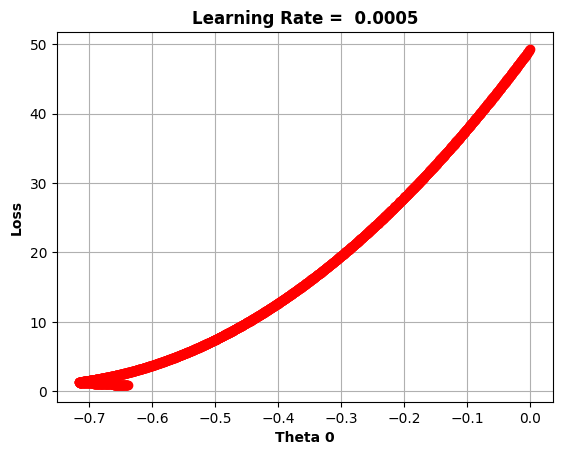

In [134]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.0005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

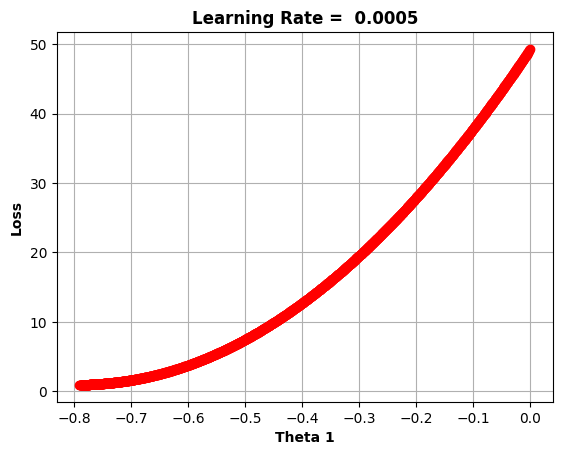

In [135]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.0005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

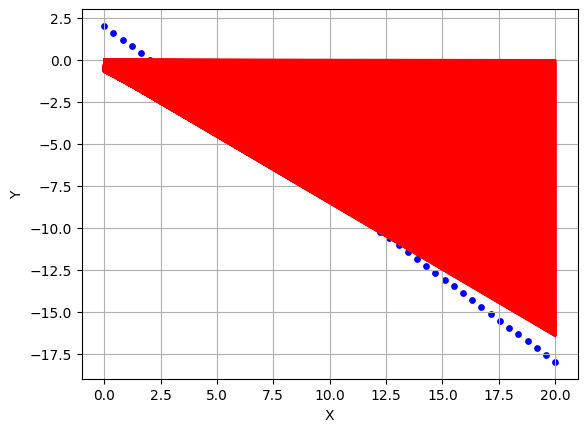

In [136]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

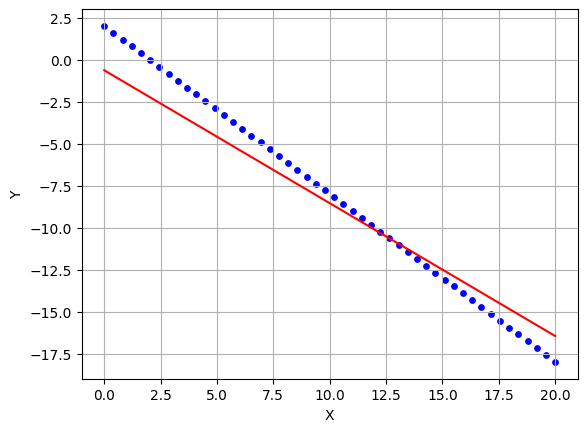

In [137]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [138]:
def compute_momentum(beta1,m_prev,gradient_vector):
    m_current = beta1 * m_prev + (1 - beta1) * gradient_vector
    m_prev = m_current
    return m_current

In [139]:
def compute_second_term(previous_grad,gradient_vector,beta2):
  return beta2 * previous_grad + (1-beta2) * (gradient_vector ** 2)

In [140]:
def bias_correct(mt,vt,beta1,beta2,t):
  mt_corrected= mt / (1 - beta1 ** t)
  vt_corrected = vt / (1 - beta2 ** t)
  return mt_corrected,vt_corrected


In [141]:
def update_adam(theta,learning_rate,vt_corrected,mt_corrected,epsilon):
  theta[0] -= (learning_rate / np.sqrt(vt_corrected[0] + epsilon )) * mt_corrected[0]
  theta[1] -= (learning_rate / np.sqrt(vt_corrected[1] + epsilon ))  * mt_corrected[1]
  return theta


In [142]:
def compute_ADAM(X,y,learning_rate,beta1,beta2,epsilon,max_iterations):
    loss =[]
    theta = np.array([[0.0],[0.0]])
    previous_grad=np.array([[0.0],[0.0]])
    m = np.array([[0.0],[0.0]])
    all_theta_0 = []
    all_theta_1 = []
    all_hx = []
    tolerance = 0.001
    first_iteration = True
    for iteration in range(max_iterations):
        print(f"******************* Iteration: {iteration} *******************************")

        hx = predict(theta,X)
        all_hx.append(hx)
        print(f"h(x):{hx} \n")

        e = compute_error(hx,y)
        print(f"Error vector: {e} \n")

        j = compute_cost(e,X)
        loss.append(j)
        print(f"j = {j} \n")

        gradient_vector = compute_gradient_vector(e,X)
        print(f"Gradient_vector:  {gradient_vector} \n")

        gradient_vector_norm = compute_gradient_norm(gradient_vector)
        print(f"Gradient_vector_norm: {gradient_vector_norm} \n")

        m = compute_momentum(beta1,m,gradient_vector)
        print(f"m_0 : {m[0][0]}")
        print(f"m_1 : {m[1][0]}")

        accumulate_grad = compute_second_term(previous_grad,gradient_vector,beta2)
        previous_grad = accumulate_grad
        print(f"v_0 : {accumulate_grad[0][0]}")
        print(f"v_1 : {accumulate_grad[1][0]}")

        mt_corrected , vt_corrected =  bias_correct(m,accumulate_grad,beta1,beta2,iteration+1)
        print(f"m_corrected_0 : {mt_corrected[0][0]}")
        print(f"m_corrected_1 : {mt_corrected[1][0]}")

        print(f"vt_corrected_0 : {vt_corrected[0][0]}")
        print(f"vt_corrected_1 : {vt_corrected[1][0]}")

        all_theta_0.append(theta[0][0])
        all_theta_1.append(theta[1][0])

        if not first_iteration:
            if abs(loss[iteration] - loss[iteration - 1]) < tolerance:
                print(f"Converged at iteration {iteration} with cost: {loss[iteration]} \n")
                break
            if gradient_vector_norm < tolerance:
                print(f"Stopping at iteration {iteration} due to small gradient norm: {gradient_vector_norm} \n")
                break

        theta = update_adam(theta,learning_rate,vt_corrected,mt_corrected,epsilon)
        print(f"new theta_0 : {theta[0][0]}")
        print(f"new theta_1 : {theta[1][0]}")

        first_iteration = False

    print ("************************** Training Report ****************************")
    print(f"Gradient Descent converged after {len(all_theta_1)} epochs \n")
    print(f"Final theta_0: {theta[0][0]}")
    print(f"Final theta_1: {theta[1][0]} \n")

    return all_theta_0, all_theta_1, loss, all_hx, theta


##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [143]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_ADAM(
        X, y, learning_rate=0.05,beta1=0.2,beta2=0.7,epsilon= 1e-08, max_iterations=500
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

******************* Iteration: 0 *******************************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.346938775510196 

Gradient_vector:  [[  8.        ]
 [114.69387755]] 

Gradient_vector_norm: 114.97254258164628 

m_0 : 6.4
m_1 : 91.755102040

In [145]:
hx = predict(optimum_theta,X)
print(f"r2_score: {r2_score(y,hx)}")

r2_score: 0.9989675217511285


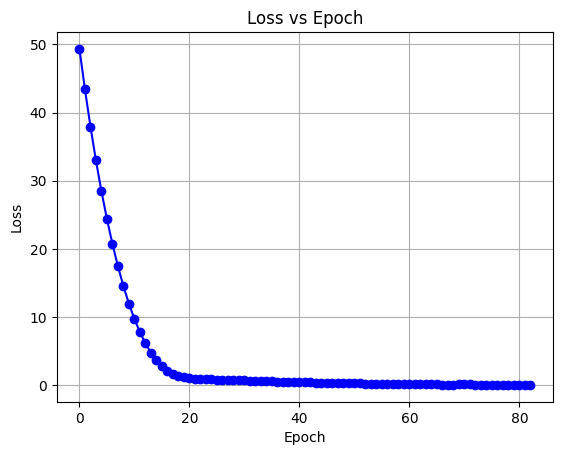

In [146]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

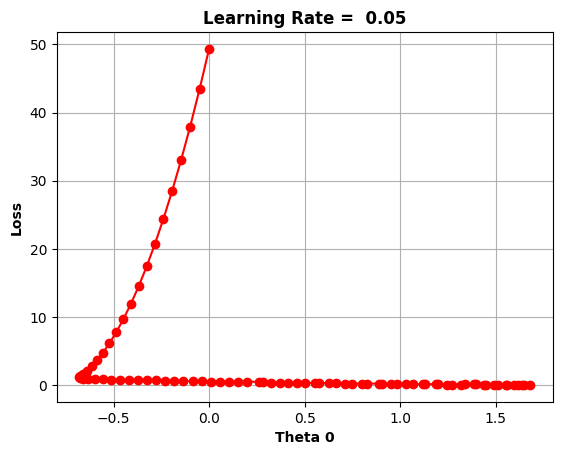

In [147]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.05',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

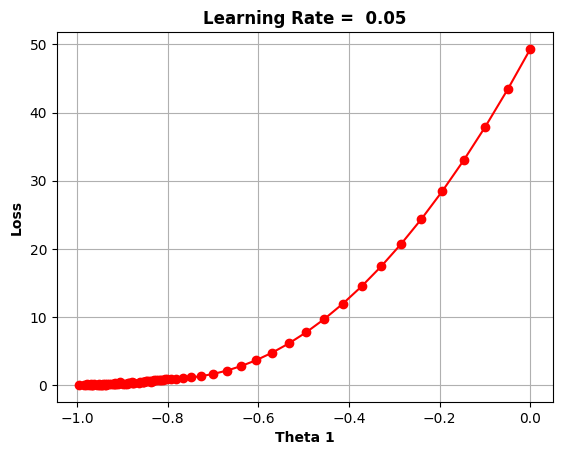

In [148]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.05',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

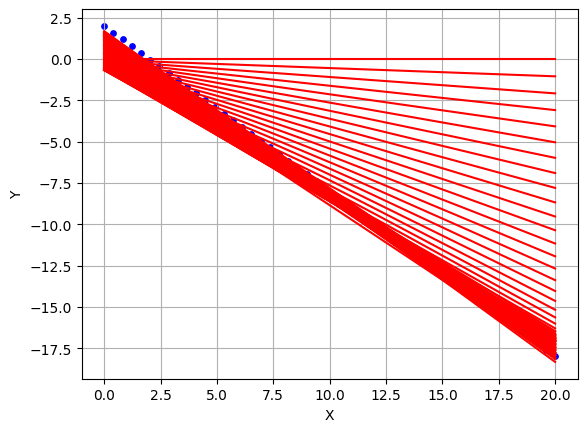

In [149]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

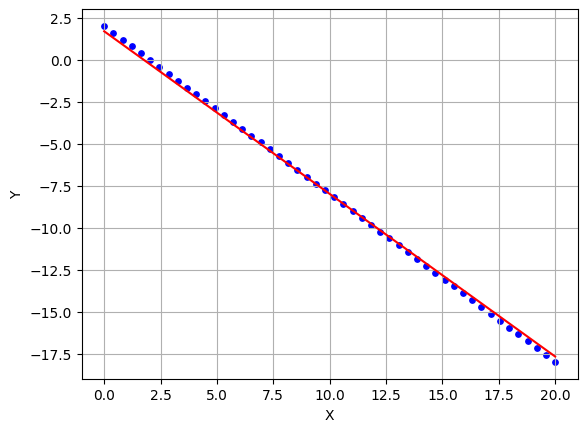

In [150]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [151]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_ADAM(
        X, y, learning_rate=0.005,beta1=0.5,beta2=0.8,epsilon= 1e-08, max_iterations=500
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
       -5.82542667, -5.98101037, -6.13659408, -6.29217778, -6.44776149,
       -6.60334519, -6.7589289 , -6.91451261, -7.07009631, -7.22568002,
       -7.38126372, -7.53684743, -7.69243113, -7.84801484, -8.00359854]), array([-0.38479022, -0.54234357, -0.69989692, -0.85745027, -1.01500363,
       -1.17255698, -1.33011033, -1.48766368, -1.64521703, -1.80277038,
       -1.96032373, -2.11787708, -2.27543043, -2.43298378, -2.59053713,
       -2.74809048, -2.90564383, -3.06319718, -3.22075053, -3.37830388,
       -3.53585723, -3.69341058, -3.85096393, -4.00851728, -4.16607063,
       -4.32362398, -4.48117733, -4.63873069, -4.79628404, -4.95383739,
       -5.11139074, -5.26894409, -5.42649744, -5.58405079, -5.74160414,
       -5.89915749, -6.05671084, -6.21426419, -6.37181754, -6.52937089,
       -6.68692424, -6.84447759, -7.00203094, -7.15958429, -7.31713764,
       -7.47469099, -7.63224434, -7.78979769, -7.94735104, -8.10490439]), array([-0

In [152]:
hx = predict(optimum_theta,X)
print(f"r2_score: {r2_score(y,hx)}")

r2_score: 0.9927019871731135


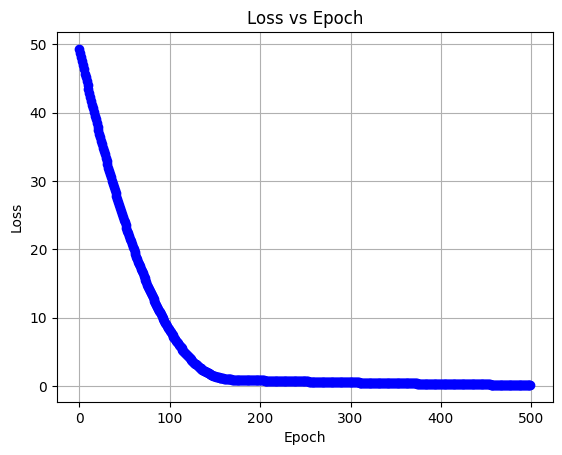

In [153]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

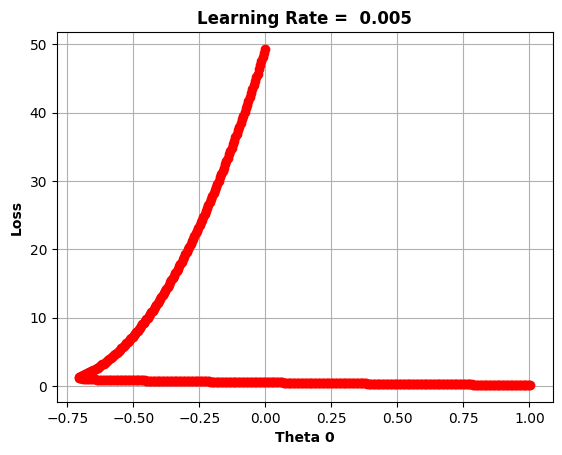

In [154]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

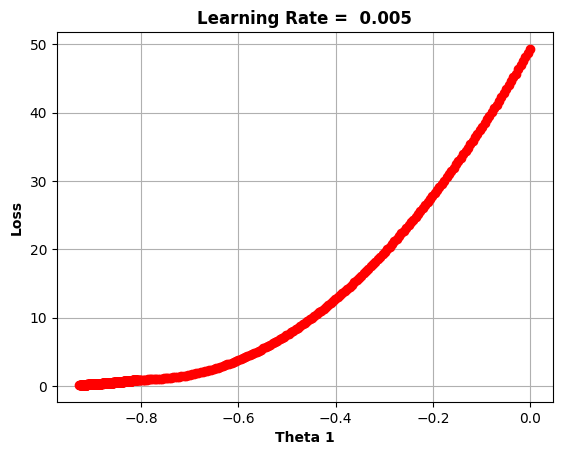

In [155]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

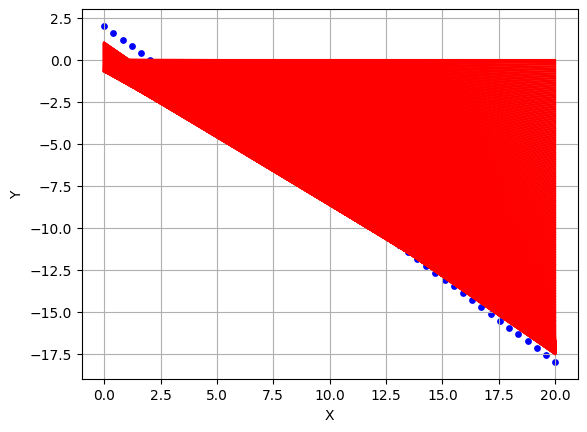

In [156]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

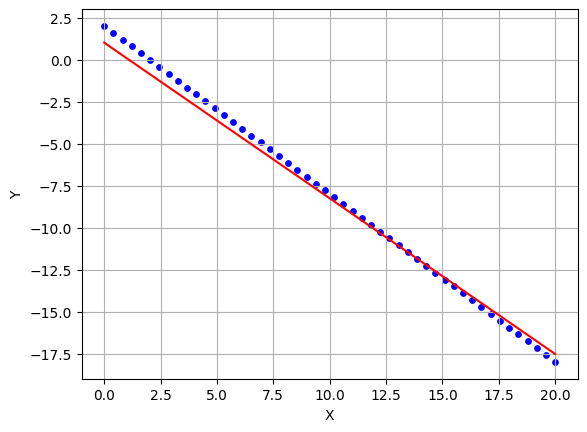

In [157]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [158]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_ADAM(
        X, y, learning_rate=0.0005,beta1=0.8,beta2=0.8,epsilon= 1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
        -7.25817282,  -7.49653662,  -7.73490043,  -7.97326423,
        -8.21162804,  -8.44999184,  -8.68835564,  -8.92671945,
        -9.16508325,  -9.40344706,  -9.64181086,  -9.88017467,
       -10.11853847, -10.35690228, -10.59526608, -10.83362989,
       -11.07199369, -11.3103575 , -11.5487213 , -11.78708511,
       -12.02544891, -12.26381272]), array([ -0.58448622,  -0.8230541 ,  -1.06162197,  -1.30018985,
        -1.53875772,  -1.7773256 ,  -2.01589347,  -2.25446135,
        -2.49302922,  -2.7315971 ,  -2.97016497,  -3.20873285,
        -3.44730072,  -3.6858686 ,  -3.92443647,  -4.16300435,
        -4.40157222,  -4.6401401 ,  -4.87870797,  -5.11727585,
        -5.35584372,  -5.5944116 ,  -5.83297947,  -6.07154735,
        -6.31011522,  -6.5486831 ,  -6.78725097,  -7.02581885,
        -7.26438672,  -7.5029546 ,  -7.74152247,  -7.98009035,
        -8.21865822,  -8.4572261 ,  -8.69579397,  -8.93436184,
        -9.17292972,  -9.41149

In [159]:
hx = predict(optimum_theta, X)
print(f"r2_score : {r2_score(y,hx)}")

r2_score : 0.9467806662318571


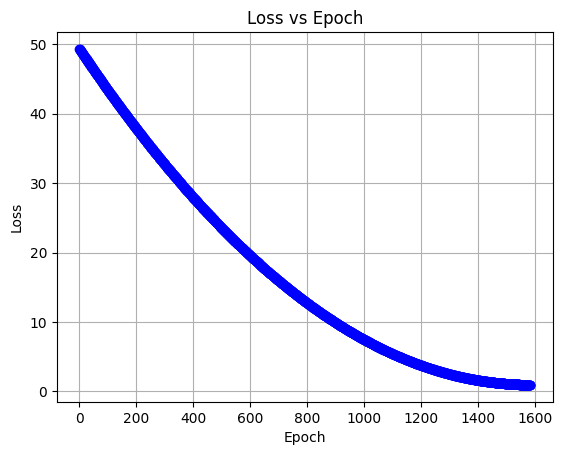

In [160]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

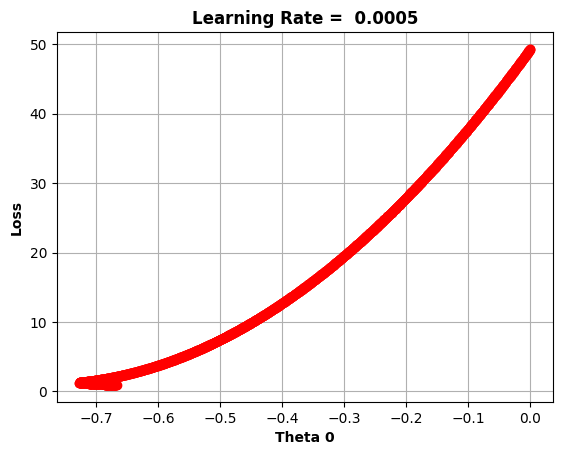

In [161]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.0005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

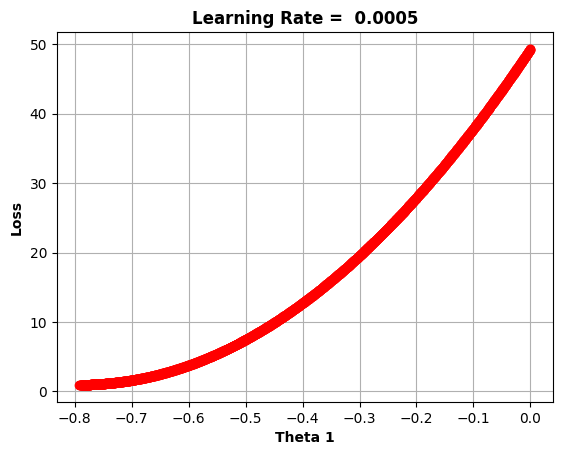

In [162]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.0005',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

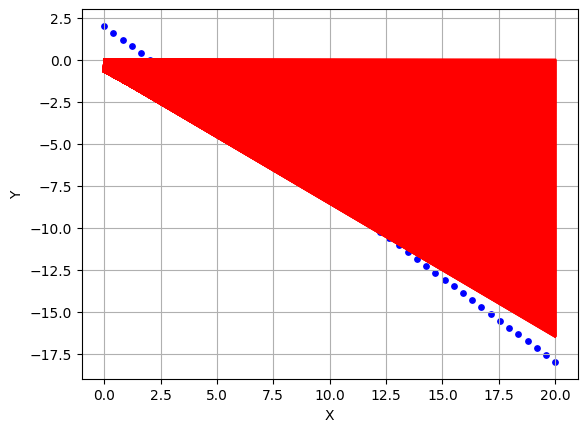

In [163]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

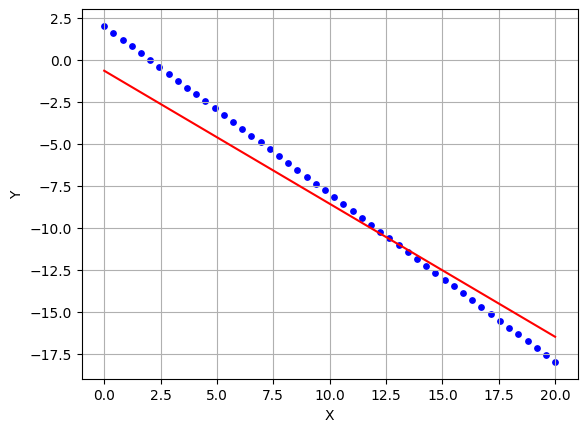

In [164]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [165]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_ADAM(
        X, y, learning_rate=0.001,beta1=0.9,beta2=0.99,epsilon= 1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
        -7.01315134,  -7.24394801,  -7.47474469,  -7.70554136,
        -7.93633804,  -8.16713471,  -8.39793139,  -8.62872806,
        -8.85952474,  -9.09032141,  -9.32111808,  -9.55191476,
        -9.78271143, -10.01350811, -10.24430478, -10.47510146,
       -10.70589813, -10.9366948 , -11.16749148, -11.39828815,
       -11.62908483, -11.8598815 ]), array([ -0.5515165 ,  -0.78261728,  -1.01371806,  -1.24481883,
        -1.47591961,  -1.70702039,  -1.93812117,  -2.16922195,
        -2.40032273,  -2.63142351,  -2.86252429,  -3.09362507,
        -3.32472584,  -3.55582662,  -3.7869274 ,  -4.01802818,
        -4.24912896,  -4.48022974,  -4.71133052,  -4.9424313 ,
        -5.17353208,  -5.40463286,  -5.63573363,  -5.86683441,
        -6.09793519,  -6.32903597,  -6.56013675,  -6.79123753,
        -7.02233831,  -7.25343909,  -7.48453987,  -7.71564064,
        -7.94674142,  -8.1778422 ,  -8.40894298,  -8.64004376,
        -8.87114454,  -9.10224

In [166]:
hx = predict(optimum_theta,X)
print(f"r2_score: {r2_score(y,hx)}")

r2_score: 0.9485667803059895


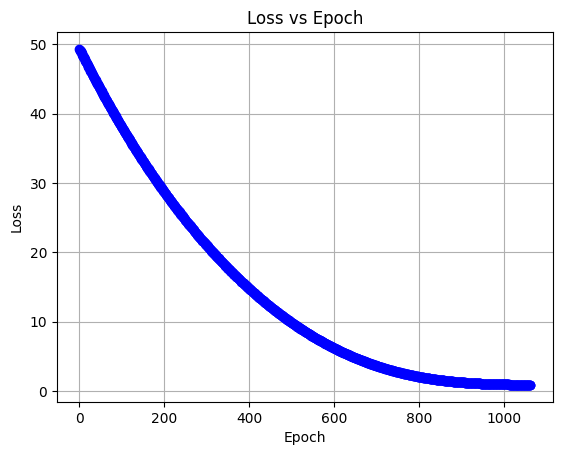

In [167]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

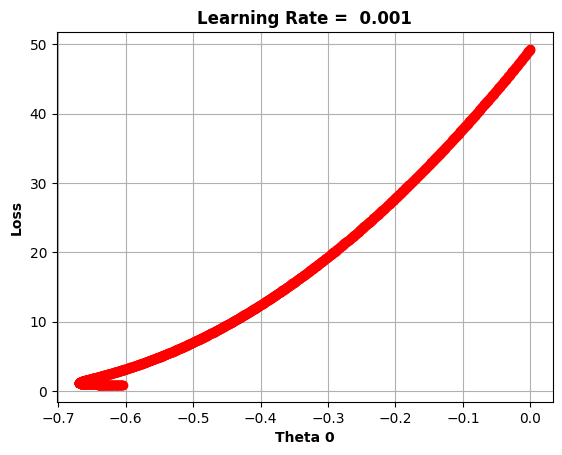

In [168]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.001',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

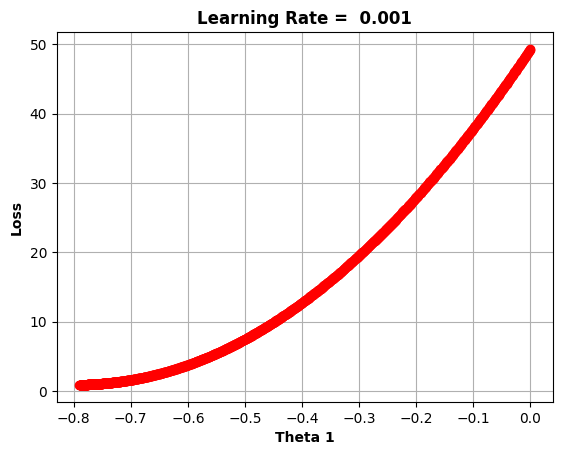

In [169]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.001',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

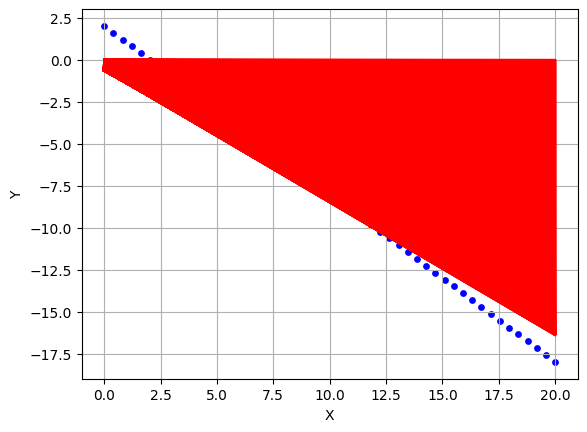

In [170]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

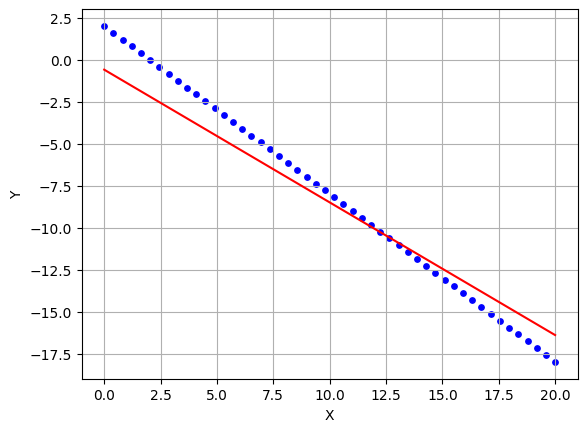

In [171]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [172]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_ADAM(
        X, y, learning_rate=0.001,beta1=0.9,beta2=0.5,epsilon= 1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
       -0.92694478, -1.05130742, -1.17567007, -1.30003272, -1.42439537,
       -1.54875801, -1.67312066, -1.79748331, -1.92184596, -2.0462086 ,
       -2.17057125, -2.2949339 , -2.41929655, -2.54365919, -2.66802184,
       -2.79238449, -2.91674714, -3.04110979, -3.16547243, -3.28983508,
       -3.41419773, -3.53856038, -3.66292302, -3.78728567, -3.91164832,
       -4.03601097, -4.16037361, -4.28473626, -4.40909891, -4.53346156,
       -4.6578242 , -4.78218685, -4.9065495 , -5.03091215, -5.15527479,
       -5.27963744, -5.40400009, -5.52836274, -5.65272538, -5.77708803,
       -5.90145068, -6.02581333, -6.15017598, -6.27453862, -6.39890127]), array([-0.30615073, -0.43092833, -0.55570592, -0.68048352, -0.80526112,
       -0.93003871, -1.05481631, -1.17959391, -1.30437151, -1.4291491 ,
       -1.5539267 , -1.6787043 , -1.80348189, -1.92825949, -2.05303709,
       -2.17781468, -2.30259228, -2.42736988, -2.55214747, -2.67692507,
       -2.8

In [173]:
hx = predict(optimum_theta,X)
print(f"r2_score : {r2_score(y,hx)}")

r2_score : 0.944245884714605


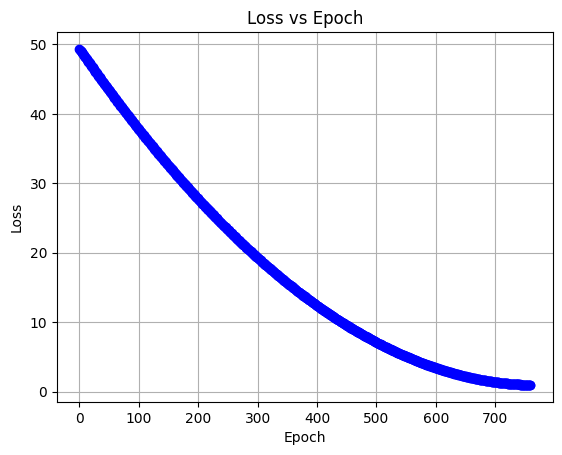

In [174]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

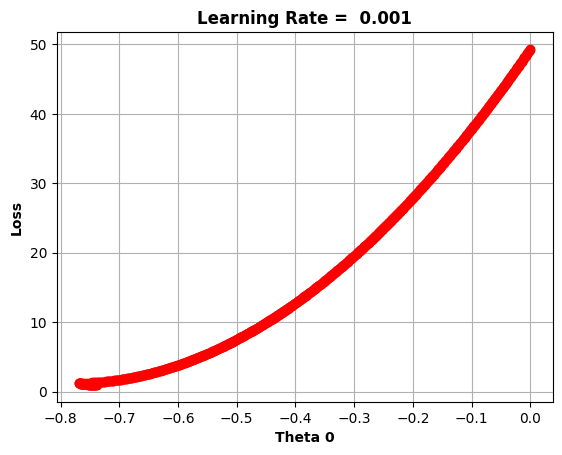

In [175]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.001',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

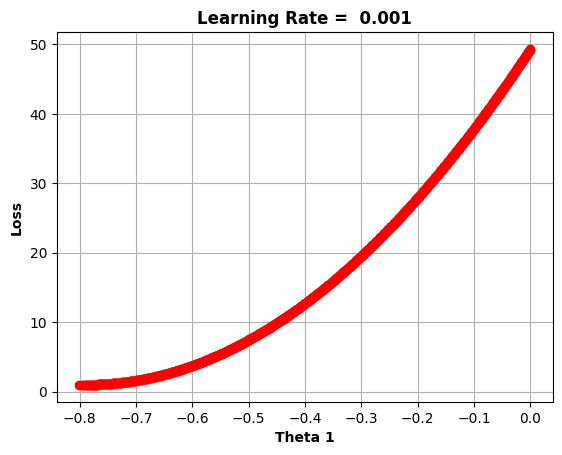

In [176]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.001',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

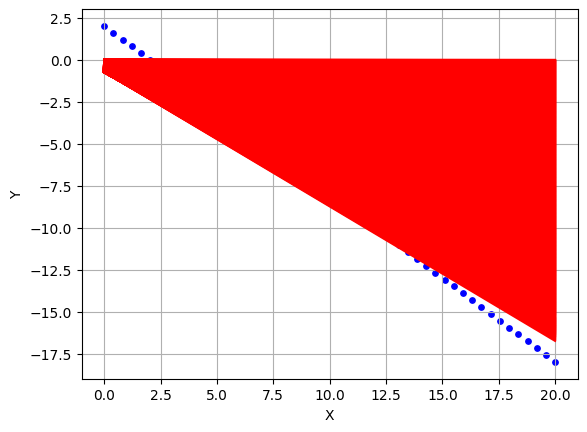

In [177]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

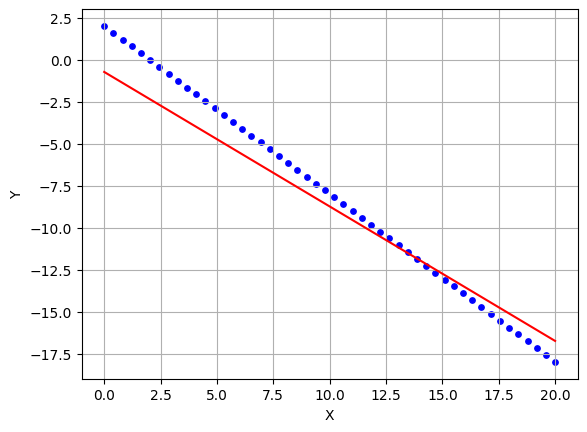

In [178]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [179]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_ADAM(
        X, y, learning_rate=0.001,beta1=0.5,beta2=0.99,epsilon= 1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
        -7.17480191,  -7.41100023,  -7.64719854,  -7.88339686,
        -8.11959517,  -8.35579349,  -8.59199181,  -8.82819012,
        -9.06438844,  -9.30058675,  -9.53678507,  -9.77298339,
       -10.0091817 , -10.24538002, -10.48157833, -10.71777665,
       -10.95397496, -11.19017328, -11.4263716 , -11.66256991,
       -11.89876823, -12.13496654]), array([ -0.56188331,  -0.79837512,  -1.03486693,  -1.27135874,
        -1.50785055,  -1.74434235,  -1.98083416,  -2.21732597,
        -2.45381778,  -2.69030959,  -2.92680139,  -3.1632932 ,
        -3.39978501,  -3.63627682,  -3.87276862,  -4.10926043,
        -4.34575224,  -4.58224405,  -4.81873586,  -5.05522766,
        -5.29171947,  -5.52821128,  -5.76470309,  -6.0011949 ,
        -6.2376867 ,  -6.47417851,  -6.71067032,  -6.94716213,
        -7.18365394,  -7.42014574,  -7.65663755,  -7.89312936,
        -8.12962117,  -8.36611298,  -8.60260478,  -8.83909659,
        -9.0755884 ,  -9.31208

In [180]:
hx = predict(optimum_theta,X)
print(f"r2_score {r2_score(y,hx)}")

r2_score 0.9493447336210686


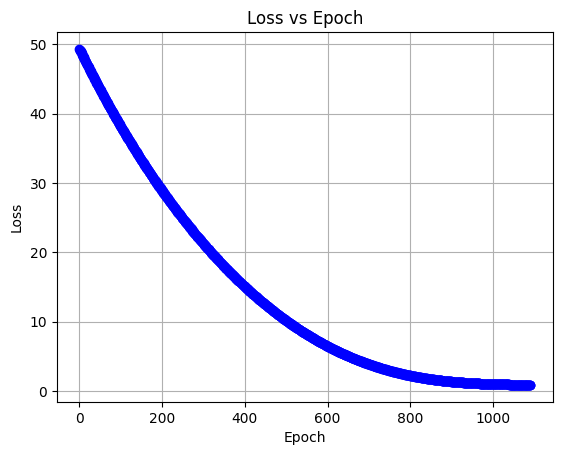

In [181]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

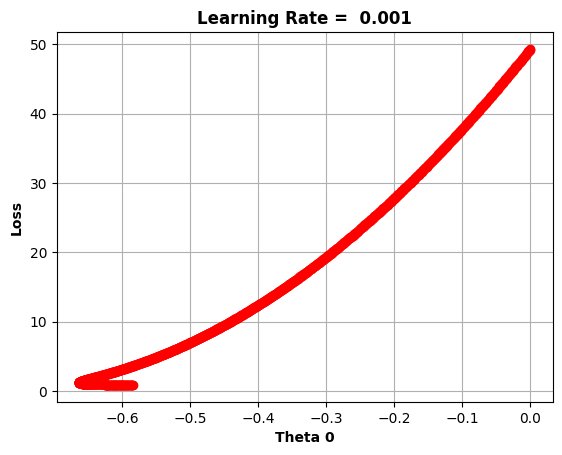

In [182]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.001',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

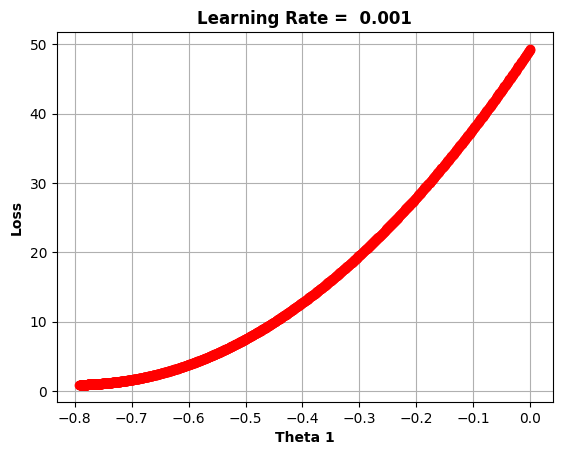

In [183]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.001',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

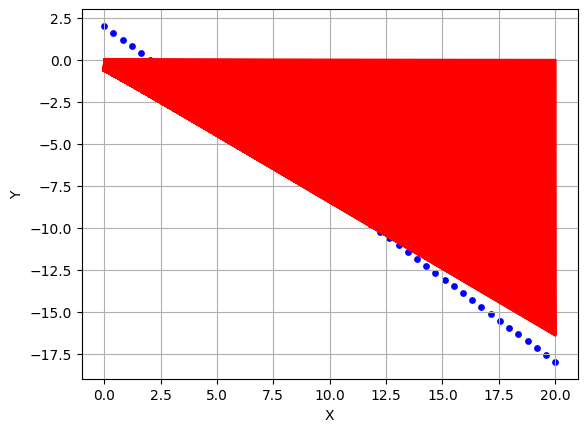

In [184]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

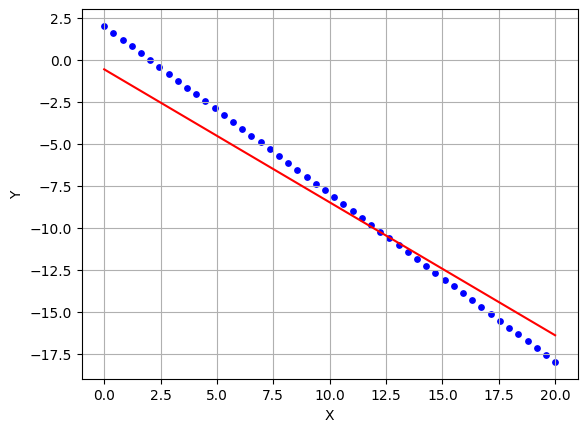

In [185]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [186]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_ADAM(
        X, y, learning_rate=0.001,beta1=0.5,beta2=0.5,epsilon= 1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
       -1.07948644, -1.22438398, -1.36928153, -1.51417908, -1.65907662,
       -1.80397417, -1.94887172, -2.09376926, -2.23866681, -2.38356436,
       -2.5284619 , -2.67335945, -2.818257  , -2.96315454, -3.10805209,
       -3.25294964, -3.39784718, -3.54274473, -3.68764228, -3.83253982,
       -3.97743737, -4.12233492, -4.26723246, -4.41213001, -4.55702756,
       -4.7019251 , -4.84682265, -4.9917202 , -5.13661774, -5.28151529,
       -5.42641284, -5.57131038, -5.71620793, -5.86110548, -6.00600302,
       -6.15090057, -6.29579812, -6.44069566, -6.58559321, -6.73049076,
       -6.8753883 , -7.02028585, -7.1651834 , -7.31008094, -7.45497849]), array([-0.3559987 , -0.50130441, -0.64661011, -0.79191582, -0.93722153,
       -1.08252724, -1.22783294, -1.37313865, -1.51844436, -1.66375007,
       -1.80905578, -1.95436148, -2.09966719, -2.2449729 , -2.39027861,
       -2.53558431, -2.68089002, -2.82619573, -2.97150144, -3.11680715,
       -3.2

In [187]:
hx = predict(optimum_theta, X)
print(f"r2_Score : {r2_score(y,hx)}")

r2_Score : 0.9475845097729344


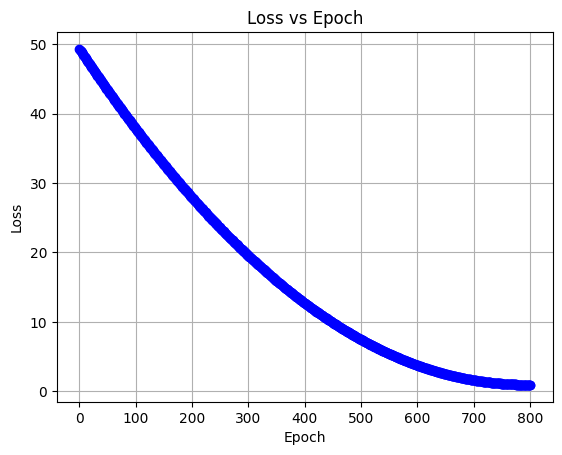

In [188]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

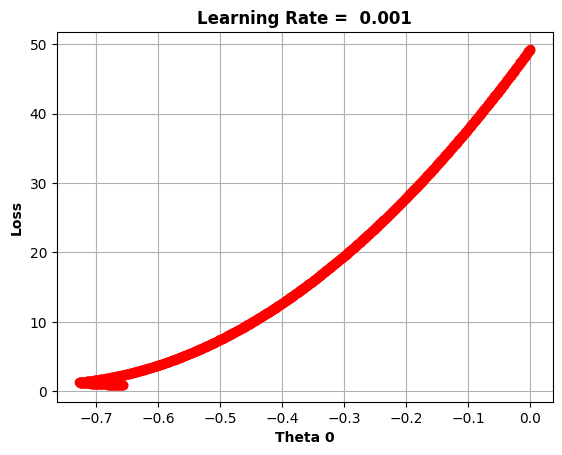

In [189]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.001',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

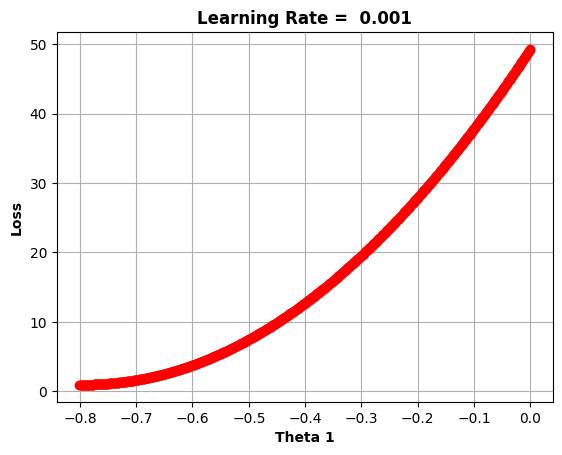

In [190]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.001',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

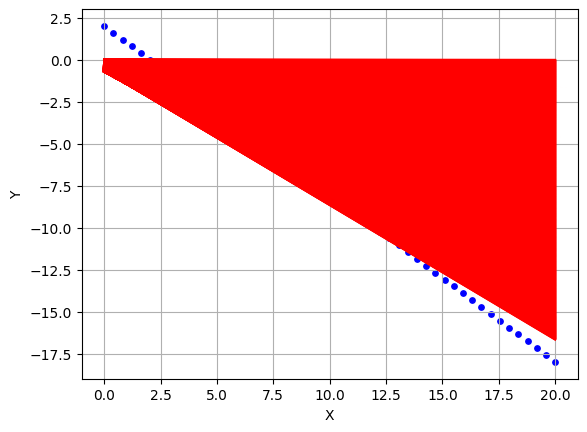

In [191]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

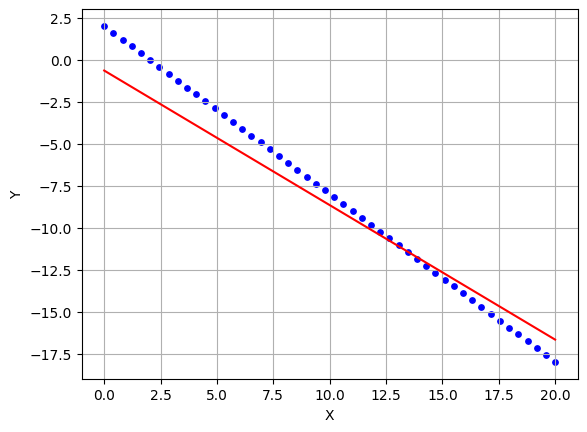

In [192]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [195]:
all_theta_0, all_theta_1, all_losses, all_hx, optimum_theta = compute_ADAM(
        X, y, learning_rate=0.01,beta1=0.9,beta2=0.99,epsilon= 1e-08, max_iterations=5000
    )

print("All Theta_0 values:", all_theta_0)
print("All Theta_1 values:", all_theta_1)
print("All losses:", all_losses)
print("All hypothesis outputs:", all_hx)
print("Optimum Theta:", optimum_theta)

Streaming output truncated to the last 5000 lines.
        -9.7136838 , -10.03748702, -10.36129025, -10.68509347,
       -11.0088967 , -11.33269992, -11.65650314, -11.98030637,
       -12.30410959, -12.62791282, -12.95171604, -13.27551927,
       -13.59932249, -13.92312571, -14.24692894, -14.57073216,
       -14.89453539, -15.21833861, -15.54214183, -15.86594506,
       -16.18974828, -16.51355151]), array([ -0.64521543,  -0.96927468,  -1.29333393,  -1.61739318,
        -1.94145243,  -2.26551168,  -2.58957093,  -2.91363018,
        -3.23768944,  -3.56174869,  -3.88580794,  -4.20986719,
        -4.53392644,  -4.85798569,  -5.18204494,  -5.5061042 ,
        -5.83016345,  -6.1542227 ,  -6.47828195,  -6.8023412 ,
        -7.12640045,  -7.4504597 ,  -7.77451896,  -8.09857821,
        -8.42263746,  -8.74669671,  -9.07075596,  -9.39481521,
        -9.71887446, -10.04293371, -10.36699297, -10.69105222,
       -11.01511147, -11.33917072, -11.66322997, -11.98728922,
       -12.31134847, -12.63540

In [196]:
hx = predict(optimum_theta, X)
print(f"r2_score : {r2_score(y,hx)}")

r2_score : 0.9952892444965017


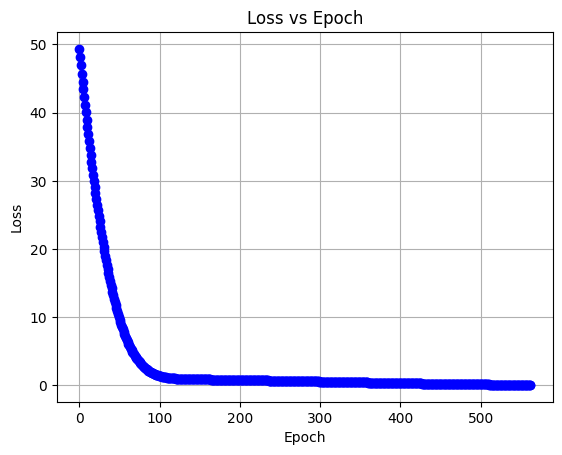

In [197]:
plt.plot(range(len(all_theta_1)),all_losses,c='blue',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

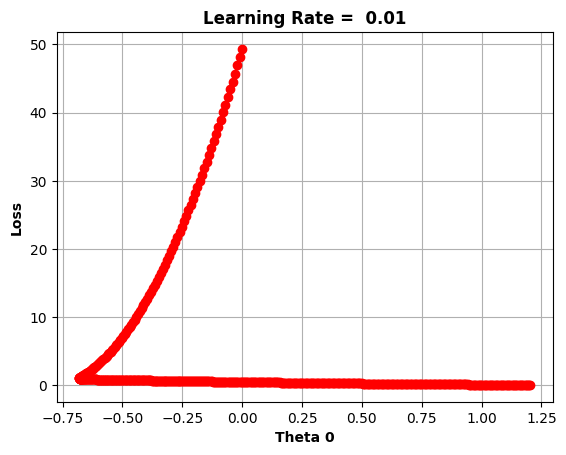

In [198]:
plt.plot(all_theta_0, all_losses, marker='o',c='red')
plt.xlabel('Theta 0',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.01',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

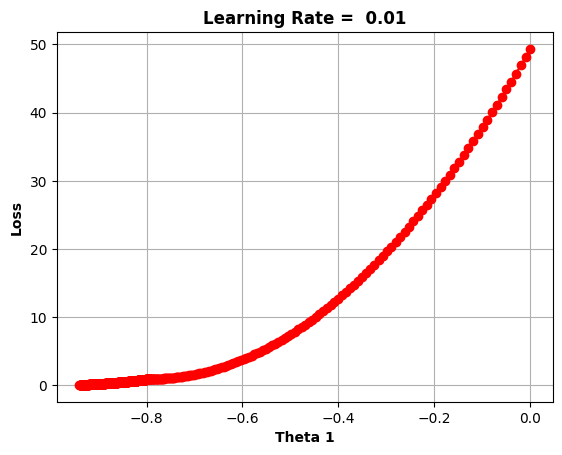

In [199]:
plt.plot(all_theta_1, all_losses, marker='o',c='red')
plt.xlabel('Theta 1',fontdict={"fontweight":"bold","fontsize":10})
plt.ylabel('Loss',fontdict={"fontweight":"bold","fontsize":10})
plt.title('Learning Rate =  0.01',fontdict={"fontweight":"bold","fontsize":12})
plt.grid(True)

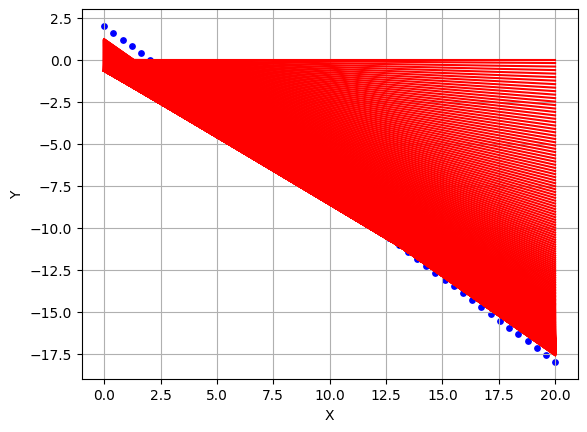

In [200]:
plt.scatter(X,y,marker='o',c='blue',s=15)
for hx in all_hx:
    plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

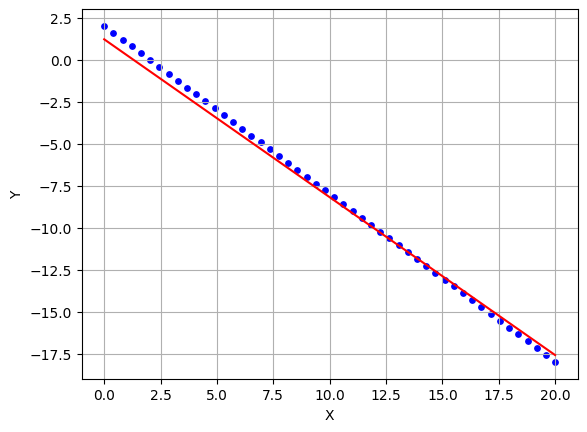

In [201]:
plt.scatter(X,y,c='blue',marker='o',s=15)
plt.plot(X,hx,c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

## Congratulations
![image.png](attachment:image.png)